In [1]:
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [2]:
resnet = ResNet50(weights="imagenet")

In [3]:
total_layers = resnet.layers
print(f'Total Layers: {len(total_layers)} ')

Total Layers: 177 


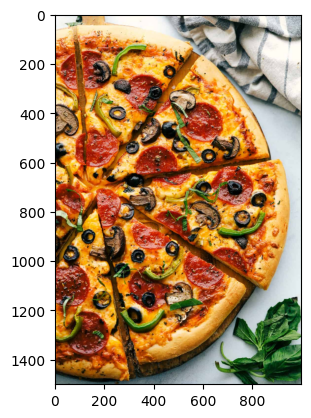

In [4]:
imageSrc = "pizza.jpg"
photo = plt.imread(imageSrc)
plt.imshow(photo)
plt.show()

In [5]:
img = image.load_img(imageSrc, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
#x

In [6]:
modelPredictions = resnet.predict(x)
#modelPredictions

1/1 [==============================] - 5s 5s/step


In [7]:
decode = decode_predictions(modelPredictions, top=3)
decode

[[('n07873807', 'pizza', 0.9999845),
  ('n04447861', 'toilet_seat', 1.4075832e-05),
  ('n07875152', 'potpie', 4.285529e-07)]]

In [8]:
_, classname, accuracy = decode_predictions(modelPredictions, top=3)[0][0]
print("Predicted Class: {}\nAccuracy: {:.2f}%".format(classname.replace("_",' '), accuracy*100))

Predicted Class: pizza
Accuracy: 100.00%


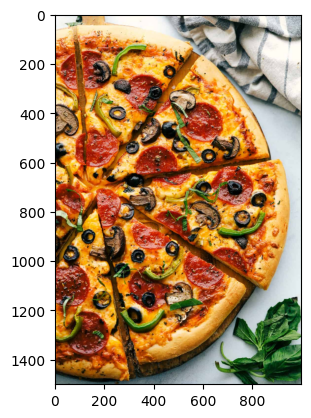

Predicted Class: pizza
Accuracy: 100.00%


In [9]:
plt.imshow(photo)
plt.show()
print("Predicted Class: {}\nAccuracy: {:.2f}%".format(classname.replace("_",' '), accuracy*100))